## Métodos de Otimização: Métodos de procura multidimensional

### Steepest Descent - Diferenças finitas

__Imports:__

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os

__Função Avaliada:__

In [2]:
def f(x, y):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x)+'\n')
    f.write(str(y))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

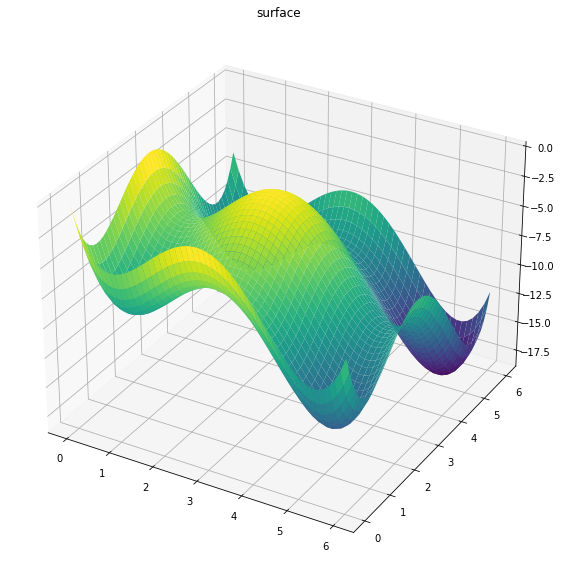

In [4]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

__Método:__

In [5]:
def grad(x, y):
    G1 = x**3 -9.*x**2 +22.*x - 13.
    G2 = y**3 -9.*y**2 +22.*y - 13.
    return G1,G2

In [6]:
alfa=0.1; kmax=20; k=0
x1old=4; x2old=4; F0 = f(x1old,x2old)
layout = "{0:.5f}"

while k < kmax:
    k += 1
    # Calculo Gradiente
    G1, G2 = grad(x1old,x2old)
    
    # Processo iterativo
    x1new=x1old-alfa*G1
    x2new=x2old-alfa*G2
    
    #Atualiza xold
    x1old = x1new
    x2old = x2new
    
    #Calculo da função
    F = f(x1new,x2new)
    print(layout.format(x1new)+" "+layout.format(x2new)+" "+layout.format(F))
    #print(layout.format(x1new,x2new,F))

4.50000 4.50000 -13.21875
5.01250 5.01250 -17.57390
5.30366 5.30366 -18.56024
5.33297 5.33297 -18.56793
5.32968 5.32968 -18.56802
5.33011 5.33011 -18.56802
5.33005 5.33005 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802
5.33006 5.33006 -18.56802


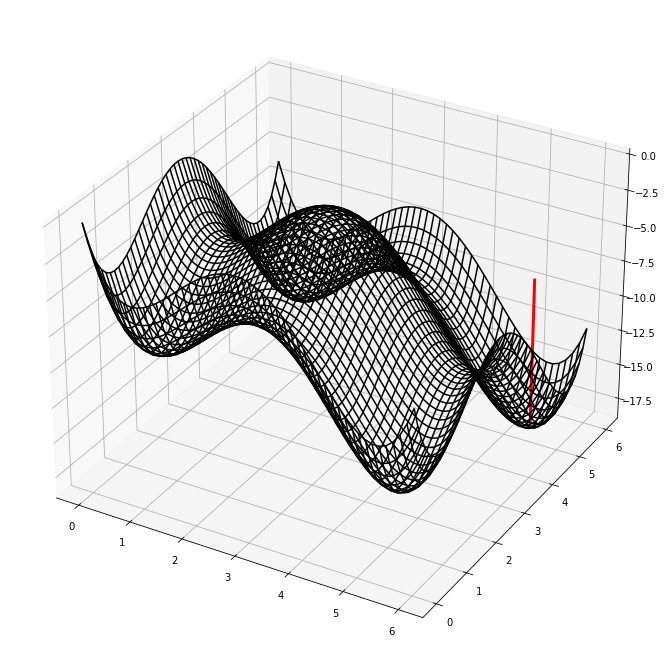

In [7]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, Z, color='black')

# Data for a three-dimensional line
zline = np.linspace(F0, F)
xline = np.linspace(x1old, x1new)
yline = np.linspace(x2old, x2new)
ax.plot3D(xline, yline, zline, 'red', linewidth = 3)

plt.show()